In [ ]:
pip install prophet

In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np


In [2]:
df = pd.read_csv('Electric_Consumption_And_Cost.csv')

# Display the first few rows of the dataset to understand its structure


<ipython-input-2-a7d46b7d3aa7>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Electric_Consumption_And_Cost.csv')


In [3]:
df.head(5)

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.0,2808.0,5323.20


In [4]:
df.shape

(148050, 27)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148050 entries, 0 to 148049
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    148050 non-null  object 
 1   Borough             148050 non-null  object 
 2   Account Name        148050 non-null  object 
 3   Location            143503 non-null  object 
 4   Meter AMR           148049 non-null  object 
 5   Meter Scope         7931 non-null    object 
 6   TDS #               146793 non-null  float64
 7   EDP                 148050 non-null  int64  
 8   RC Code             148050 non-null  object 
 9   Funding Source      148050 non-null  object 
 10  AMP #               146840 non-null  object 
 11  Vendor Name         148049 non-null  object 
 12  UMIS BILL ID        148049 non-null  float64
 13  Revenue Month       148049 non-null  object 
 14  Service Start Date  148049 non-null  object 
 15  Service End Date    148049 non-nul

In [6]:
# Check for missing, null, and NaN records
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Development Name           0
Borough                    0
Account Name               0
Location                4547
Meter AMR                  1
Meter Scope           140119
TDS #                   1257
EDP                        0
RC Code                    0
Funding Source             0
AMP #                   1210
Vendor Name                1
UMIS BILL ID               1
Revenue Month              1
Service Start Date         1
Service End Date           1
# days                     1
Meter Number               1
Estimated                247
Current Charges            1
Rate Class                 1
Bill Analyzed              1
Consumption (KWH)          1
KWH Charges                1
Consumption (KW)           1
KW Charges                 1
Other charges              1
dtype: int64


In [7]:
# Handle missing values (if any)
df.fillna(value=0, inplace=True)

In [8]:
df.describe(include='all')

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
count,148050,148050,148050,148050,148050,148050.0,148050.000000,148050.000000,148050,148050,...,148050,148050,148050.000000,148050,148050,1.480500e+05,148050.000000,148050.000000,148050.000000,148050.000000
unique,349,7,332,478,4,92.0,NaN,NaN,382,7,...,8067,3,NaN,15,3,NaN,NaN,NaN,NaN,NaN
top,RAVENSWOOD,BROOKLYN,RIIS/RIIS II/WALD/BARUCH,BLD 01,AMR,0.0,NaN,NaN,Q004800,FEDERAL,...,7223256,N,NaN,GOV/NYC/068,Yes,NaN,NaN,NaN,NaN,NaN
freq,2678,54745,4308,18131,68587,140119.0,NaN,NaN,2678,133448,...,61,123828,NaN,116938,147953,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,120.904309,427.965525,NaN,NaN,...,NaN,NaN,5059.339737,NaN,NaN,3.537604e+04,1968.079866,70.056165,1191.916010,1899.343860
std,NaN,NaN,NaN,NaN,NaN,NaN,129.592551,188.321545,NaN,NaN,...,NaN,NaN,6908.461991,NaN,NaN,5.236441e+04,3067.296913,127.549123,1950.283253,3853.887174
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,63.000000,NaN,NaN,...,NaN,NaN,-243.150000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,-59396.430000
25%,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,229.000000,NaN,NaN,...,NaN,NaN,468.125000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,181.590000
50%,NaN,NaN,NaN,NaN,NaN,NaN,65.000000,426.000000,NaN,NaN,...,NaN,NaN,3407.415000,NaN,NaN,2.240000e+04,1197.300000,38.880000,629.645000,1297.895000
75%,NaN,NaN,NaN,NaN,NaN,NaN,172.000000,555.000000,NaN,NaN,...,NaN,NaN,6900.160000,NaN,NaN,5.144000e+04,2817.610000,100.800000,1739.107500,2982.372500


In [9]:
df['Service End Date'] = pd.to_datetime(df['Service End Date'])
df['Service Start Date'] = pd.to_datetime(df['Service Start Date'])

In [31]:
# Calculate the midpoint date between 'Service Start Date' and 'Service End Date'
df['Midpoint Date'] = df['Service Start Date'] + (df['Service End Date'] - df['Service Start Date']) / 2

# Aggregating data to get total consumption for the midpoint date
daily_data = df.groupby('Midpoint Date')['Consumption (KWH)'].sum().reset_index()

# Creating the monthly mean dataset based on the midpoint date
monthly_data = daily_data.set_index('Midpoint Date').resample('M').mean().reset_index()

# Creating the yearly mean dataset based on the midpoint date
yearly_data = daily_data.set_index('Midpoint Date').resample('Y').mean().reset_index()

# Renaming columns for Prophet compatibility
daily_data = daily_data.rename(columns={'Midpoint Date': 'ds', 'Consumption (KWH)': 'y'})
monthly_data = monthly_data.rename(columns={'Midpoint Date': 'ds', 'Consumption (KWH)': 'y'})
yearly_data = yearly_data.rename(columns={'Midpoint Date': 'ds', 'Consumption (KWH)': 'y'})




In [32]:
# Removing NaN values from the datasets
daily_data = daily_data.dropna()
monthly_data = monthly_data.dropna()
yearly_data = yearly_data.dropna()

# Display the first few rows of the cleaned datasets
daily_data.head(), monthly_data.head(), yearly_data.head()

(                   ds            y
 0 1970-01-01 00:00:00          0.0
 1 2010-01-03 00:00:00         33.0
 2 2010-01-09 00:00:00    1364720.0
 3 2010-01-09 12:00:00  103825164.0
 4 2010-01-11 00:00:00       4320.0,
             ds             y
 0   1970-01-31  0.000000e+00
 480 2010-01-31  1.328728e+07
 481 2010-02-28  1.862791e+07
 482 2010-03-31  1.474633e+07
 483 2010-04-30  1.484610e+07,
            ds             y
 0  1970-12-31  0.000000e+00
 40 2010-12-31  1.695725e+07
 42 2012-12-31  1.437800e+07
 43 2013-12-31  1.286315e+07
 44 2014-12-31  1.198408e+07)

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have already loaded your dataset into `yearly_data`, `monthly_data`, and `daily_data`

# Function to apply and tune the Prophet model
def apply_and_tune_prophet_model(df, periods, frequency):
    # Initialize the Prophet model with the specified growth
    model = Prophet(growth='linear', yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

    # Add custom seasonality if you know your data has specific seasonal patterns
    model.add_seasonality(name='custom_yearly', period=365.25, fourier_order=10)

    # Fit the model to historical data
    model.fit(df)

    # Make a future dataframe for future predictions
    future = model.make_future_dataframe(periods=periods, freq=frequency)

    # Predict the future
    forecast = model.predict(future)

    return model, forecast

# Apply the model to each dataset
forecast_periods = {'daily': 365, 'monthly': 12, 'yearly': 10}
frequency = {'daily': 'D', 'monthly': 'M', 'yearly': 'Y'}



In [72]:
model_daily, forecast_daily = apply_and_tune_prophet_model(daily_data, forecast_periods['daily'], frequency['daily'])
model_monthly, forecast_monthly = apply_and_tune_prophet_model(monthly_data, forecast_periods['monthly'], frequency['monthly'])
model_yearly, forecast_yearly = apply_and_tune_prophet_model(yearly_data, forecast_periods['yearly'], frequency['yearly'])


DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/bhacyd9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/elu8hepa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30714', 'data', 'file=/tmp/tmpowqw9c8z/bhacyd9y.json', 'init=/tmp/tmpowqw9c8z/elu8hepa.json', 'output', 'file=/tmp/tmpowqw9c8z/prophet_modelywt5qxg0/prophet_model-20231212032704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:27:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:27:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/0q1nloal.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/lqy7xsn2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

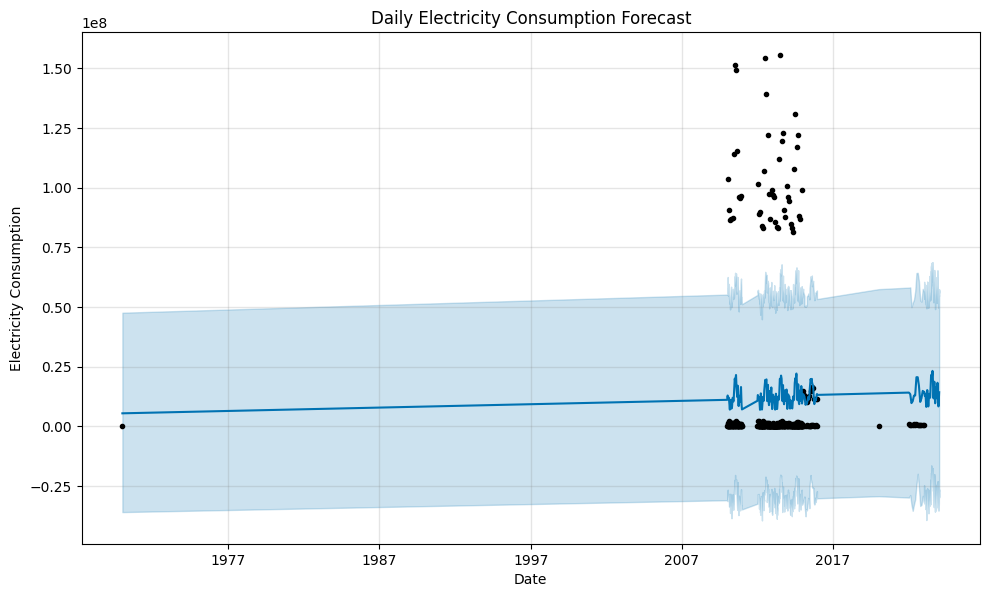

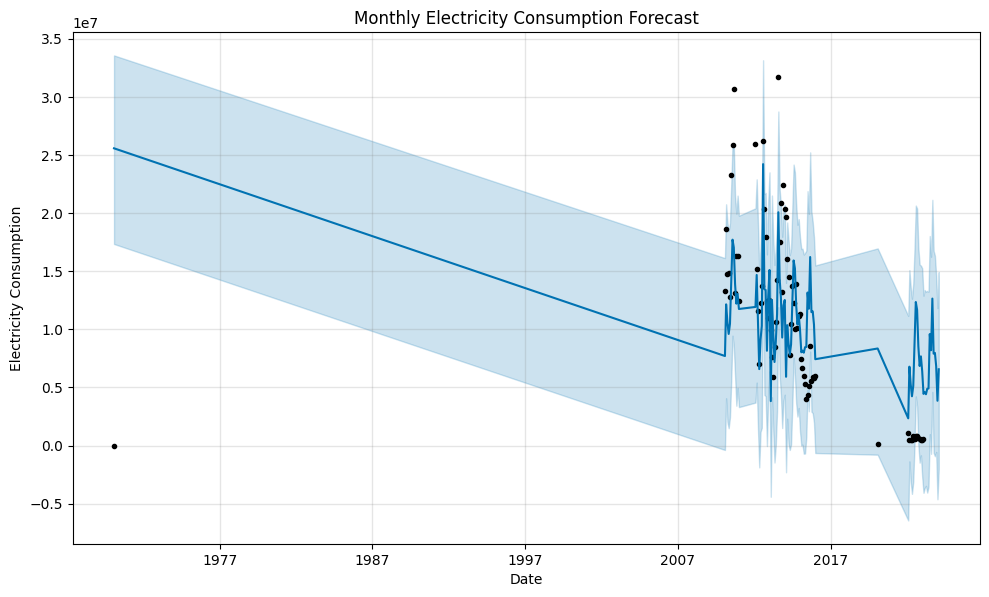

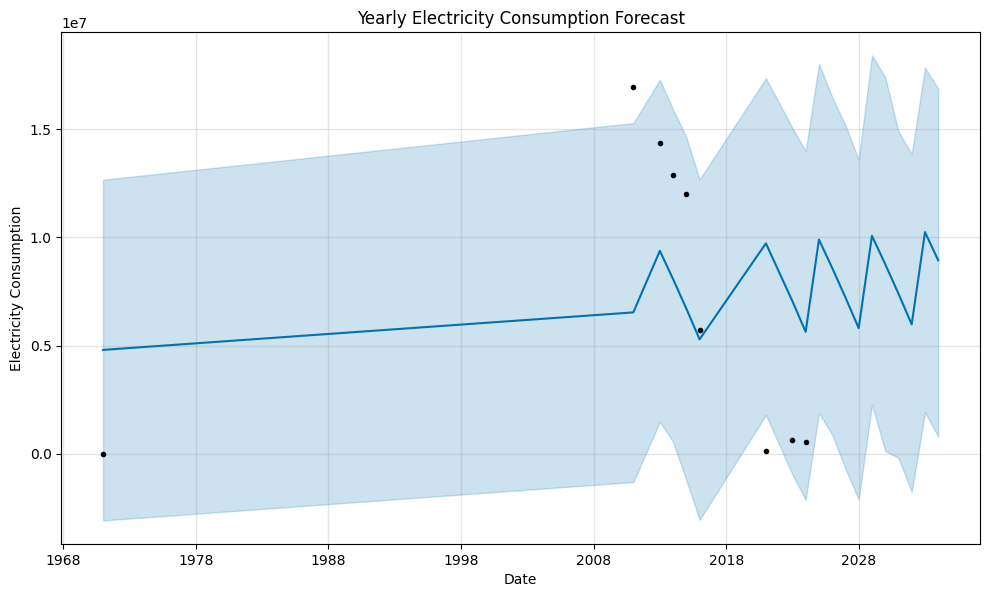

In [73]:
import matplotlib.pyplot as plt

# Plotting function
def plot_prophet_forecast(model, forecast, title):
    fig = model.plot(forecast)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Electricity Consumption')
    plt.show()

# Plot the forecast for daily data
plot_prophet_forecast(model_daily, forecast_daily, 'Daily Electricity Consumption Forecast')

# Plot the forecast for monthly data
plot_prophet_forecast(model_monthly, forecast_monthly, 'Monthly Electricity Consumption Forecast')

# Plot the forecast for yearly data
plot_prophet_forecast(model_yearly, forecast_yearly, 'Yearly Electricity Consumption Forecast')

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to apply and tune the Prophet model using logistic growth
def apply_and_tune_prophet_model_logistic(df, periods, frequency, cap_value):
    # Add a 'cap' column for the carrying capacity to the existing dataframe for logistic growth
    df['cap'] = cap_value

    # If you have data where the floor might not be zero, you need to specify it as well
    # For example, df['floor'] = some_floor_value
    # Then, you would also pass future['floor'] = some_floor_value in the future dataframe creation

    # Initialize the Prophet model with logistic growth
    model = Prophet(growth='logistic', yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

    # Add custom seasonality if you know your data has specific seasonal patterns
    model.add_seasonality(name='custom_yearly', period=365.25, fourier_order=10)

    # Fit the model to historical data
    model.fit(df)

    # Make a future dataframe for future predictions
    future = model.make_future_dataframe(periods=periods, freq=frequency)
    # Add the 'cap' to the future dataframe for logistic growth predictions
    future['cap'] = cap_value

    # Predict the future
    forecast = model.predict(future)

    return model, forecast

# Example usage of the function:
# Let's assume we've loaded our datasets into `yearly_data`, `monthly_data`, and `daily_data`
# And let's assume that our carrying capacity is some value greater than any historical data point

# Apply the model to each dataset with a specified cap value
cap_value = 1.2 * max(yearly_data['y'].max(), monthly_data['y'].max(), daily_data['y'].max())  # 20% above the max historical value
forecast_periods = {'daily': 365, 'monthly': 12, 'yearly': 10}
frequency = {'daily': 'D', 'monthly': 'M', 'yearly': 'Y'}




In [74]:
model_daily, forecast_daily = apply_and_tune_prophet_model_logistic(daily_data, forecast_periods['daily'], frequency['daily'], cap_value)
model_monthly, forecast_monthly = apply_and_tune_prophet_model_logistic(monthly_data, forecast_periods['monthly'], frequency['monthly'], cap_value)
model_yearly, forecast_yearly = apply_and_tune_prophet_model_logistic(yearly_data, forecast_periods['yearly'], frequency['yearly'], cap_value)



DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/3ae9i33g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/v2kjk0ia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66341', 'data', 'file=/tmp/tmpowqw9c8z/3ae9i33g.json', 'init=/tmp/tmpowqw9c8z/v2kjk0ia.json', 'output', 'file=/tmp/tmpowqw9c8z/prophet_model5k_ibnj7/prophet_model-20231212032728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:27:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:27:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/97gpsf1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/hymnony8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

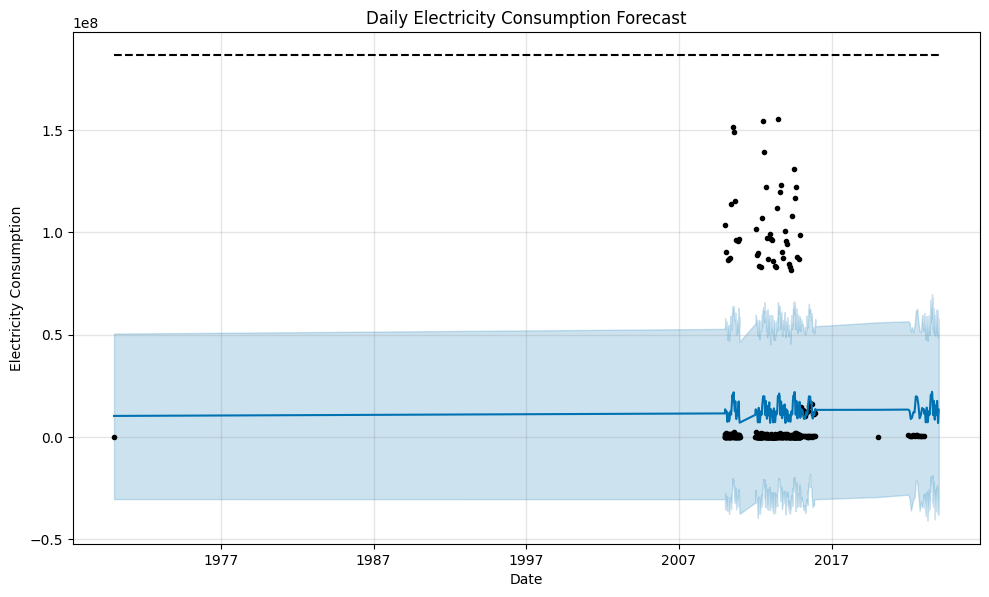

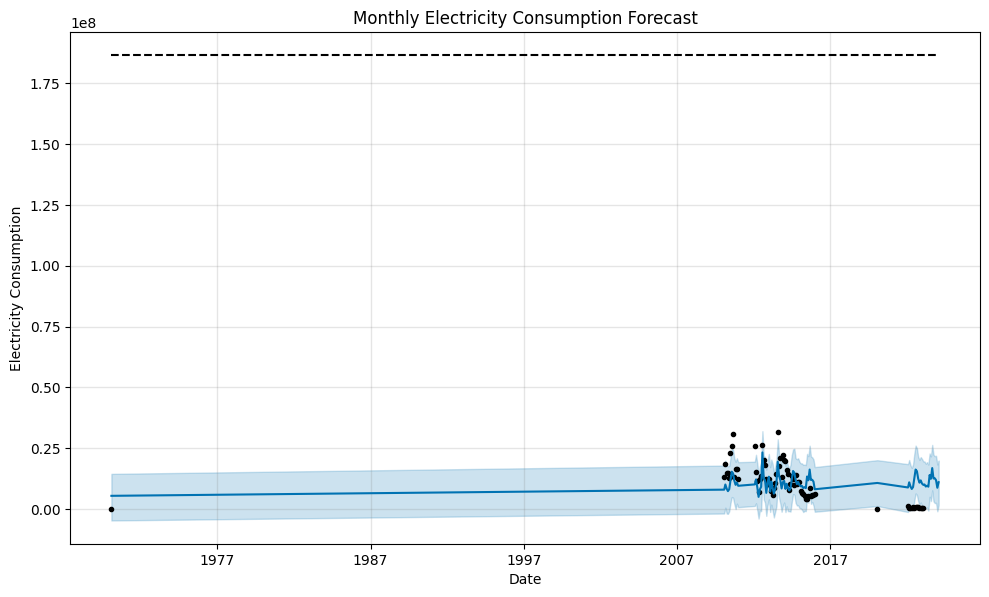

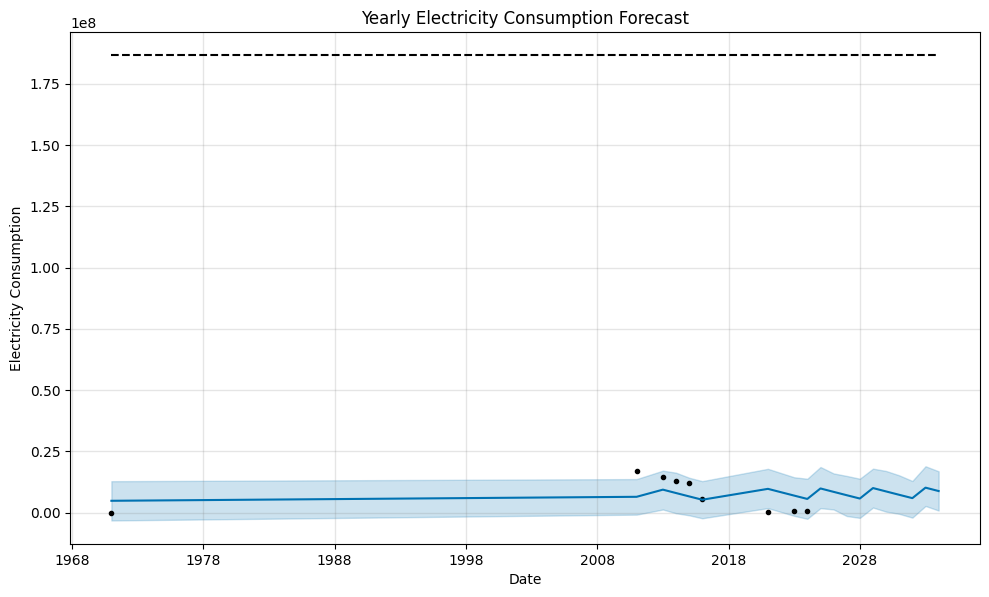

In [75]:
import matplotlib.pyplot as plt

# Plotting function
def plot_prophet_forecast(model, forecast, title):
    fig = model.plot(forecast)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Electricity Consumption')
    plt.show()

# Plot the forecast for daily data
plot_prophet_forecast(model_daily, forecast_daily, 'Daily Electricity Consumption Forecast')

# Plot the forecast for monthly data
plot_prophet_forecast(model_monthly, forecast_monthly, 'Monthly Electricity Consumption Forecast')

# Plot the forecast for yearly data
plot_prophet_forecast(model_yearly, forecast_yearly, 'Yearly Electricity Consumption Forecast')


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Splitting each dataset into historical and predicted parts for evaluation
split_index_daily = len(daily_data) - forecast_periods['daily']
split_index_monthly = len(monthly_data) - forecast_periods['monthly']
split_index_yearly = len(yearly_data) - forecast_periods['yearly']

historical_daily = daily_data[:split_index_daily]
predicted_daily = forecast_daily[-forecast_periods['daily']:]
historical_daily_length = len(historical_daily)
predicted_daily_values = forecast_daily['yhat'][-historical_daily_length:]


historical_monthly = monthly_data[:split_index_monthly]
predicted_monthly = forecast_monthly[-forecast_periods['monthly']:]

historical_yearly = yearly_data[:split_index_yearly]
predicted_yearly = forecast_yearly[-forecast_periods['yearly']:]

# Evaluation
mae_daily = mean_absolute_error(historical_daily['y'], predicted_daily_values)
mape_daily = mean_absolute_percentage_error(historical_daily['y'], predicted_daily_values)
r2_daily = r2_score(historical_daily['y'], predicted_daily_values)

<ipython-input-59-ef1b5d1ab9ba>:6: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [60]:
# Printing evaluation metrics and predicted values in a tabular format
print("Daily Forecast Metrics:")
print(f"MAE: {mae_daily}, MAPE: {mape_daily}%, R²: {r2_daily}")

Daily Forecast Metrics:
MAE: 24845353.755196057, MAPE: inf%, R²: -0.026160767125041895


In [61]:
print("Daily Forecast Predictions:")

# Print predicted values for daily data
print(predicted_daily[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Daily Forecast Predictions:
                     ds          yhat    yhat_lower    yhat_upper
769 2024-01-04 12:00:00  1.319346e+07 -3.196282e+07  5.362991e+07
770 2024-01-05 12:00:00  1.354691e+07 -3.200553e+07  5.432249e+07
771 2024-01-06 12:00:00  1.385427e+07 -2.785883e+07  5.215743e+07
772 2024-01-07 12:00:00  1.411110e+07 -2.854884e+07  5.589194e+07
773 2024-01-08 12:00:00  1.431457e+07 -2.876758e+07  5.774057e+07


In [62]:
# Print the last few predicted values for the monthly forecast
print("Monthly Forecast Predictions:")
print(forecast_monthly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


Monthly Forecast Predictions:
           ds          yhat    yhat_lower    yhat_upper
82 2023-09-30  7.908454e+06 -1.196740e+06  1.641606e+07
83 2023-10-31  7.971088e+06 -5.119111e+04  1.635526e+07
84 2023-11-30  6.834589e+06 -1.311348e+06  1.547466e+07
85 2023-12-31  3.856812e+06 -4.292864e+06  1.245531e+07
86 2024-01-31  6.566290e+06 -1.951015e+06  1.489193e+07


In [63]:
# Print the last few predicted values for the yearly forecast
print("Yearly Forecast Predictions:")
print(forecast_yearly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


Yearly Forecast Predictions:
           ds          yhat    yhat_lower    yhat_upper
14 2029-12-31  8.762716e+06  7.835059e+05  1.713587e+07
15 2030-12-31  7.399078e+06 -7.674402e+05  1.515477e+07
16 2031-12-31  5.980919e+06 -1.628412e+06  1.376432e+07
17 2032-12-31  1.024339e+07  2.343555e+06  1.823387e+07
18 2033-12-31  8.935986e+06  7.344668e+05  1.641914e+07


In [64]:
# Adjusted evaluation for monthly data
historical_monthly_length = len(historical_monthly)
predicted_monthly_values = forecast_monthly['yhat'][-historical_monthly_length:]

mae_monthly = mean_absolute_error(historical_monthly['y'], predicted_monthly_values)
mape_monthly = mean_absolute_percentage_error(historical_monthly['y'], predicted_monthly_values)
r2_monthly = r2_score(historical_monthly['y'], predicted_monthly_values)

# Print evaluation metrics for monthly data
print("Monthly Forecast Metrics:")
print(f"MAE: {mae_monthly}, MAPE: {mape_monthly}%, R²: {r2_monthly}")


Monthly Forecast Metrics:
MAE: 5054861.40774491, MAPE: inf%, R²: -0.024060413316350227


<ipython-input-59-ef1b5d1ab9ba>:6: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [65]:
# Adjusted evaluation for yearly data
historical_yearly_length = len(historical_yearly)
predicted_yearly_values = forecast_yearly['yhat'][-historical_yearly_length:]

mae_yearly = mean_absolute_error(historical_yearly['y'], predicted_yearly_values)
mape_yearly = mean_absolute_percentage_error(historical_yearly['y'], predicted_yearly_values)
r2_yearly = r2_score(historical_yearly['y'], predicted_yearly_values)

# Print evaluation metrics for yearly data
print("Yearly Forecast Metrics:")
print(f"MAE: {mae_yearly}, MAPE: {mape_yearly}%, R²: {r2_yearly}")

Yearly Forecast Metrics:
MAE: 6252315.008126171, MAPE: inf%, R²: -0.1697882788506886


<ipython-input-59-ef1b5d1ab9ba>:6: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


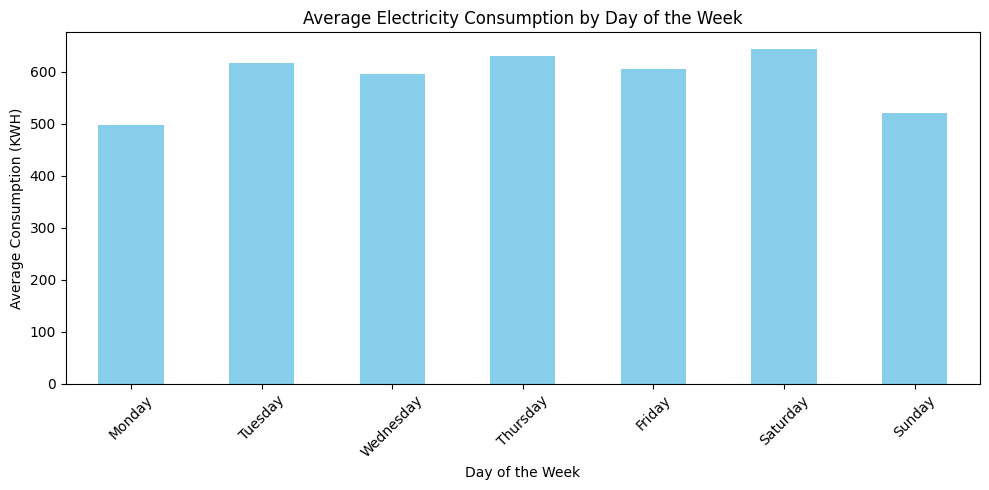

In [77]:
# As we don't have the actual dataset and its structure, the following is a generalized example code.
# You will need to adjust this code based on your actual data's format and structure.

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data generation for demonstration purposes
# In practice, you would load your dataset using pd.read_csv or other pandas data loading methods
date_rng = pd.date_range(start='1/1/2022', end='1/08/2022', freq='H')
df_sample = pd.DataFrame(date_rng, columns=['date'])
df_sample['Consumption (KWH)'] = np.random.randint(100, 1000, size=(len(date_rng)))

# Ensure the date column is in datetime format
df_sample['date'] = pd.to_datetime(df_sample['date'])

# Set the date as the index
df_sample.set_index('date', inplace=True)

# Add a column for the day of the week
df_sample['DayOfWeek'] = df_sample.index.day_name()

# Aggregate data by day of the week
weekly_data = df_sample.groupby('DayOfWeek')['Consumption (KWH)'].mean()

# Since the groupby operation loses the order of days, we reindex with the correct order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_data = weekly_data.reindex(ordered_days)

# Plot the data
plt.figure(figsize=(10, 5))
weekly_data.plot(kind='bar', color='skyblue')
plt.title('Average Electricity Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Consumption (KWH)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()



<ipython-input-82-35c896c1e221>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['Midpoint Date'] = borough_df['Service Start Date'] + (borough_df['Service End Date'] - borough_df['Service Start Date']) / 2
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/ffi98yyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/02f3ur47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27625', 'data', 'file=/tmp/tmpowqw9c8z/ffi98yyq.json', 'init=/tmp/tmpowqw9c8z/02f3ur47.json', 'output', 'file=/tmp/tmpowqw9c8z/prophet_modele9muyqt6/prophet_model-20231212034347.csv', 'method=optimize', 'algorit

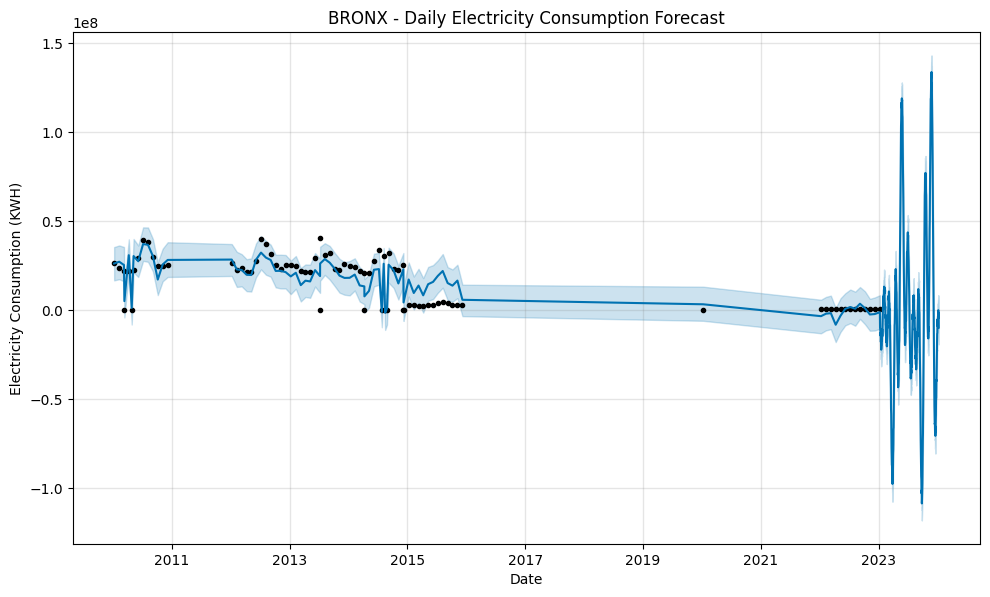

<ipython-input-82-35c896c1e221>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['Midpoint Date'] = borough_df['Service Start Date'] + (borough_df['Service End Date'] - borough_df['Service Start Date']) / 2
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/6qpubc2y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/m7bhsnpj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20779', 'data', 'file=/tmp/tmpowqw9c8z/6qpubc2y.json', 'init=/tmp/tmpowqw9c8z/m7bhsnpj.json', 'output', 'file=/tmp/tmpowqw9c8z/prophet_modelbywzrlnz/prophet_model-20231212034350.csv', 'method=optimize', 'algorit

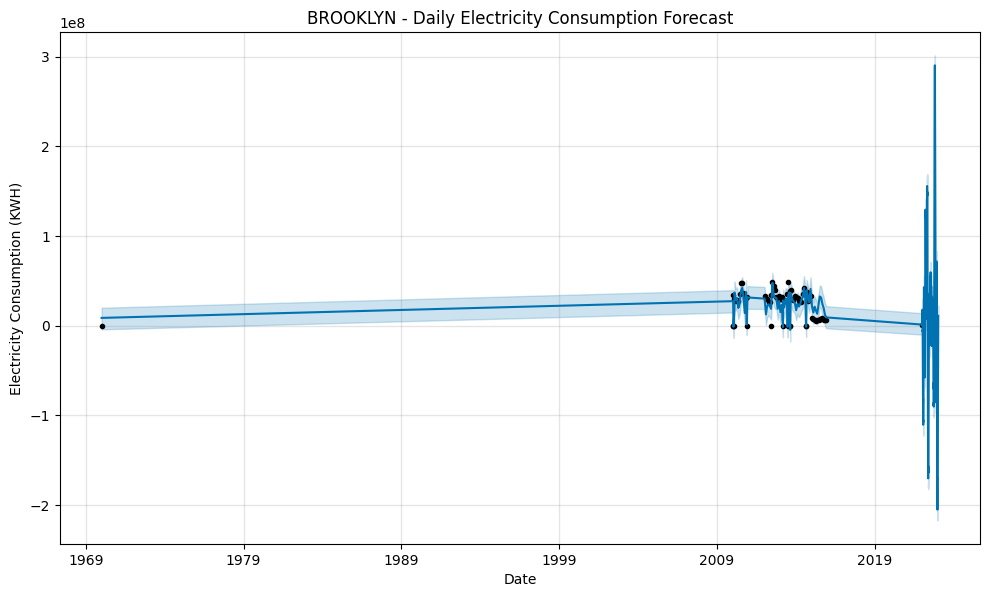

<ipython-input-82-35c896c1e221>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['Midpoint Date'] = borough_df['Service Start Date'] + (borough_df['Service End Date'] - borough_df['Service Start Date']) / 2
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/g_9jvt6k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/smhsd64p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81513', 'data', 'file=/tmp/tmpowqw9c8z/g_9jvt6k.json', 'init=/tmp/tmpowqw9c8z/smhsd64p.json', 'output', 'file=/tmp/tmpowqw9c8z/prophet_model0uy7okf6/prophet_model-20231212034351.csv', 'method=optimize', 'algorit

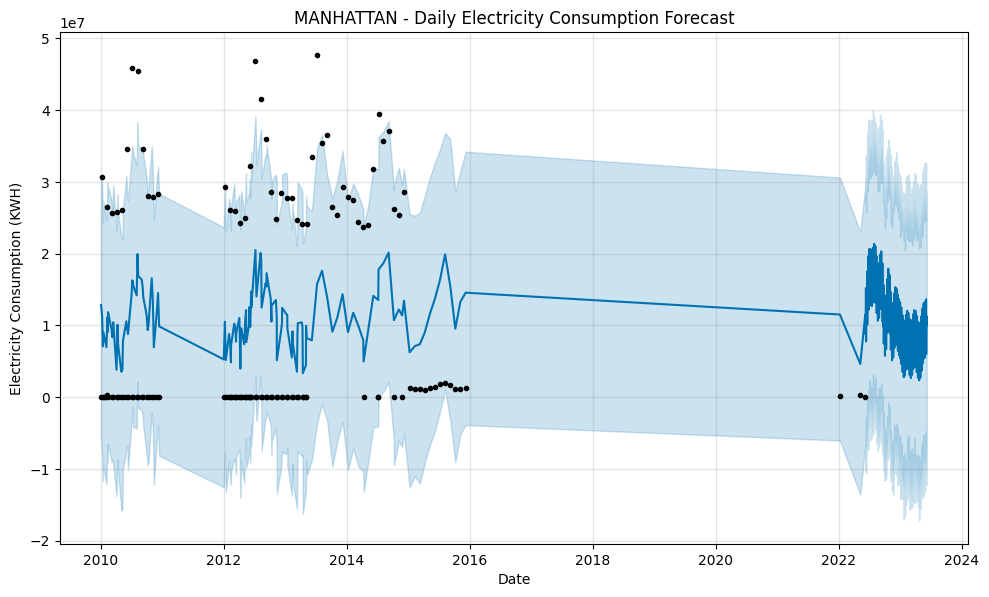

<ipython-input-82-35c896c1e221>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['Midpoint Date'] = borough_df['Service Start Date'] + (borough_df['Service End Date'] - borough_df['Service Start Date']) / 2
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/qca44440.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/spnbyl0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88583', 'data', 'file=/tmp/tmpowqw9c8z/qca44440.json', 'init=/tmp/tmpowqw9c8z/spnbyl0t.json', 'output', 'file=/tmp/tmpowqw9c8z/prophet_modeln0oxy5wn/prophet_model-20231212034352.csv', 'method=optimize', 'algorit

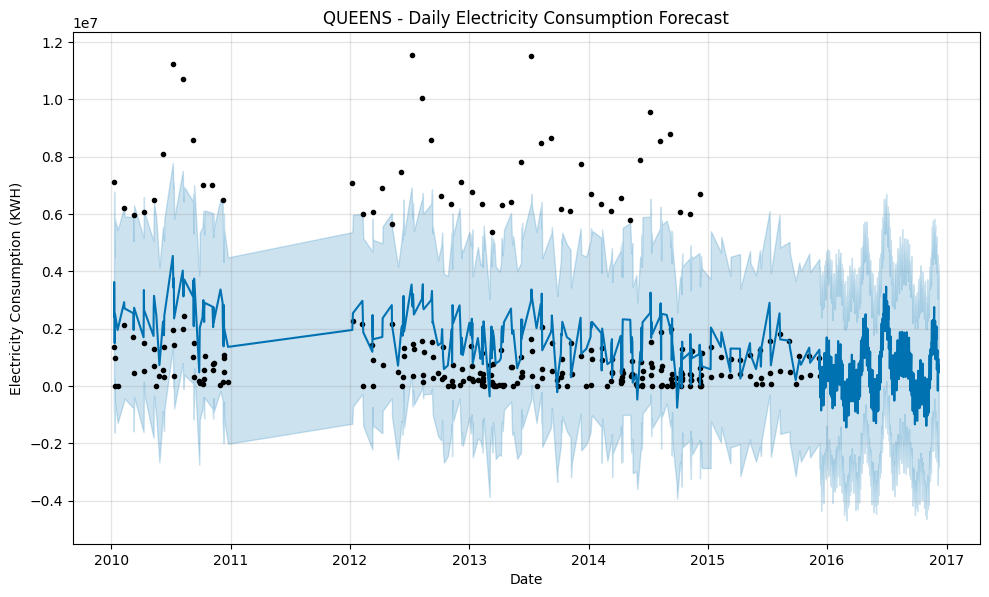

<ipython-input-82-35c896c1e221>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['Midpoint Date'] = borough_df['Service Start Date'] + (borough_df['Service End Date'] - borough_df['Service Start Date']) / 2
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/m2ilpco5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/g95ajfdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64302', '

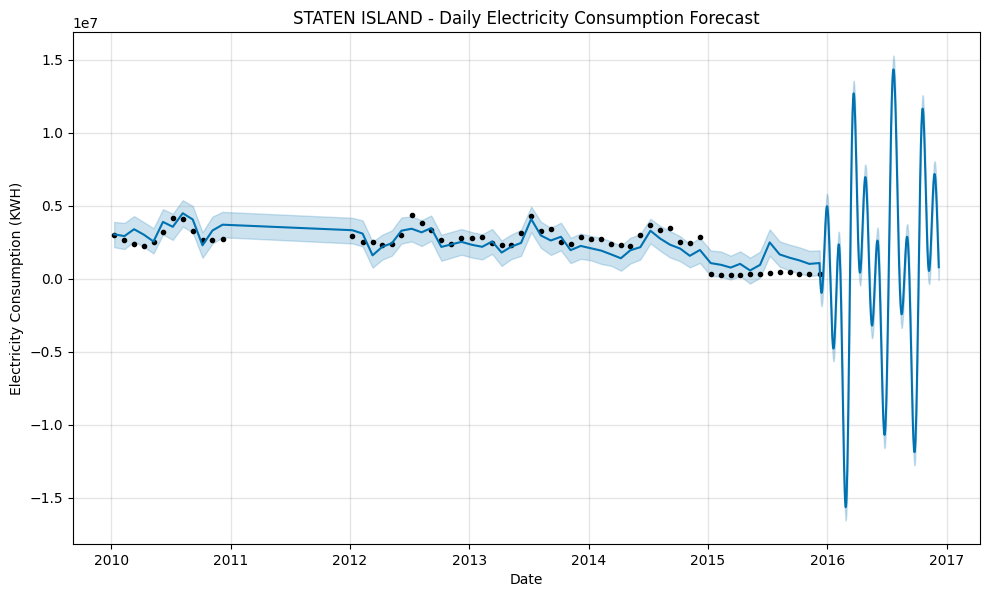

<ipython-input-82-35c896c1e221>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['Midpoint Date'] = borough_df['Service Start Date'] + (borough_df['Service End Date'] - borough_df['Service Start Date']) / 2
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/r1hf78_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/5v9eluwm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79807', 'data', 'file=/tmp/tmpowqw9c8z/r1hf78_c.json', 'init=/tmp/tmpowqw9c8z/5v9eluwm.json', 'output', 'file=/

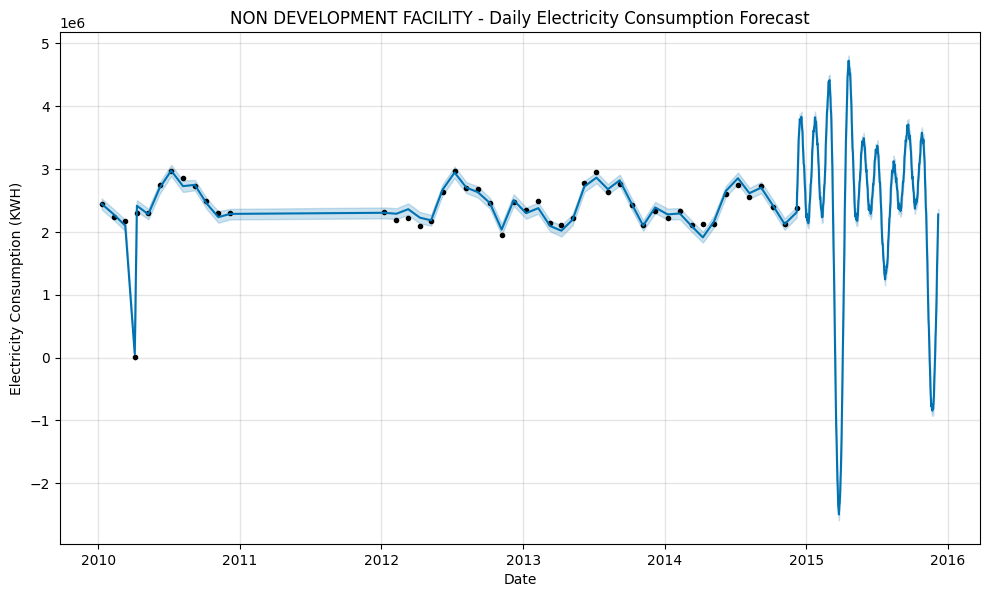

<ipython-input-82-35c896c1e221>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['Midpoint Date'] = borough_df['Service Start Date'] + (borough_df['Service End Date'] - borough_df['Service Start Date']) / 2
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/mprc_sgx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowqw9c8z/314eufvk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14490', 'data', 'file=/tmp/tmpowqw9c8z/mprc_sgx.json', 'init=/tmp/tmpowqw9c8z/314eufvk.json', 'output', 'file=/tmp/tmpowqw9c8z/prophet_modelrq2zj0iv/prophet_model-20231212034356.csv', 'method=optimize', 'algorit

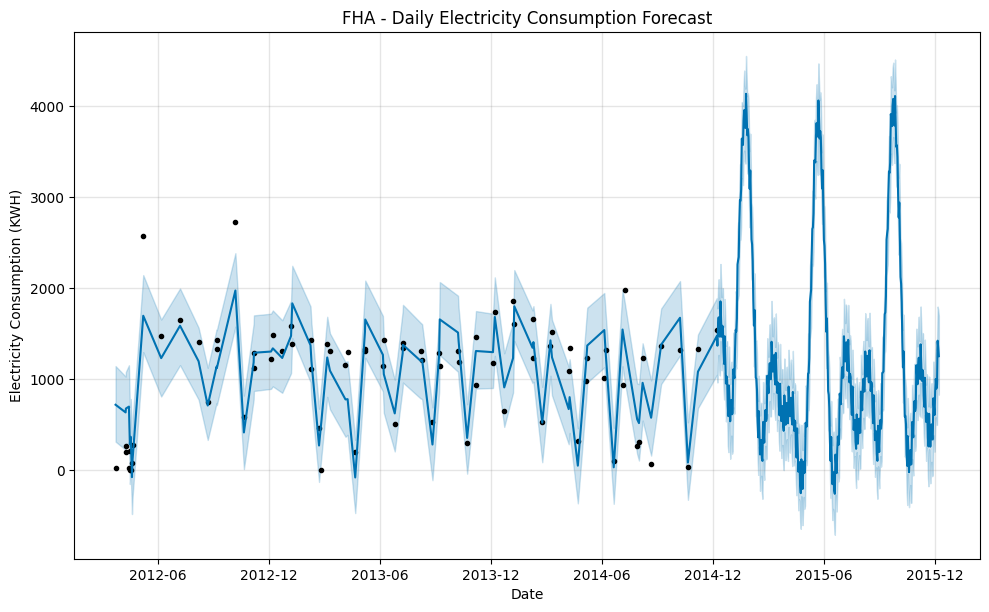

In [82]:
# Assuming 'df' has a 'Borough' column and 'Consumption (KWH)' for each entry
# Split the data by borough and forecast independently

# Create a dictionary to hold the models and forecasts for each borough
borough_models = {}
borough_forecasts = {}

# Iterate over each borough to create forecasts
for borough in df['Borough'].unique():
    # Filter the data for the current borough
    borough_df = df[df['Borough'] == borough]

    # Calculate the midpoint date between 'Service Start Date' and 'Service End Date' for the borough
    borough_df['Midpoint Date'] = borough_df['Service Start Date'] + (borough_df['Service End Date'] - borough_df['Service Start Date']) / 2

    # Aggregate data to get total consumption for the midpoint date
    borough_daily_data = borough_df.groupby('Midpoint Date')['Consumption (KWH)'].sum().reset_index()

    # Rename columns for Prophet compatibility
    borough_daily_data = borough_daily_data.rename(columns={'Midpoint Date': 'ds', 'Consumption (KWH)': 'y'})

    # Initialize the Prophet model
    m = Prophet()
    m.fit(borough_daily_data)

    # Make a dataframe for future predictions
    future = m.make_future_dataframe(periods=365)  # Let's predict one year into the future

    # Make the forecast
    forecast = m.predict(future)

    # Store the model and forecast for later reference
    borough_models[borough] = m
    borough_forecasts[borough] = forecast

    # Plot the forecast
    fig = m.plot(forecast)
    plt.title(f'{borough} - Daily Electricity Consumption Forecast')
    plt.xlabel('Date')
    plt.ylabel('Electricity Consumption (KWH)')
    plt.show()

